In [14]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import os

## Converting mica-mics metadata to ABIDE format

In [2]:
meta_fp = "/home/anirudh/Research/Brain/Datasets/mica-mics-dataset-aparca2009s/participants.tsv"
new_meta_fp = "/home/anirudh/Research/Brain/Datasets/mica-mics-dataset-aparca2009s/metadata.csv"
metadata = pd.read_csv(meta_fp, sep='\t')
metadata

,participant_id,group,age,sex,handedness
0,sub-HC001,Healthy,20-25,M,R
1,sub-HC002,Healthy,20-25,M,L
2,sub-HC003,Healthy,40-45,M,R
3,sub-HC004,Healthy,25-30,M,R
4,sub-HC005,Healthy,30-35,F,R
5,sub-HC006,Healthy,35-40,M,R
6,sub-HC007,Healthy,25-30,F,R
7,sub-HC008,Healthy,25-30,F,R
8,sub-HC009,Healthy,20-25,M,R
9,sub-HC010,Healthy,35-40,M,R


In [3]:
ages = list(metadata['age'])
averaged_ages = []
for age in ages:
    averaged_ages.append(int(age.split("-")[0]) + 2.5)

In [4]:
new_metadata = [ 
    ['SUB_ID', 'SITE_ID', 'AGE_AT_SCAN', 'SEX', 'HANDEDNESS', 'DX_GROUP' ],
]

for i in range(len(metadata)):
    new_metadata.append([
        metadata.iloc[i]['participant_id'].split("-")[1].strip(),
        'all',
        averaged_ages[i],
        1 if metadata.iloc[i]['sex'] == 'M' else 2,
        1 if metadata.iloc[i]['handedness'] == 'R' else 2,
        1,
    ])

In [5]:
new_metadata_pd = pd.DataFrame(new_metadata[1:], columns=new_metadata[0])
new_metadata_pd

,SUB_ID,SITE_ID,AGE_AT_SCAN,SEX,HANDEDNESS,DX_GROUP
0,HC001,all,22.5,1,1,1
1,HC002,all,22.5,1,2,1
2,HC003,all,42.5,1,1,1
3,HC004,all,27.5,1,1,1
4,HC005,all,32.5,2,1,1
5,HC006,all,37.5,1,1,1
6,HC007,all,27.5,2,1,1
7,HC008,all,27.5,2,1,1
8,HC009,all,22.5,1,1,1
9,HC010,all,37.5,1,1,1


In [ ]:
# new_metadata_pd.to_csv(new_meta_fp)

## Shortening timeseries data

### Averaging Strategy

In [6]:
timeseries_dir = '/home/anirudh/Research/Brain/Datasets/mica-mics-dataset-aparca2009s/timeseries'
timeseries_variants_dir = '/home/anirudh/Research/Brain/Datasets/mica-mics-dataset-aparca2009s/timeseries_variants'
subjects = list(new_metadata_pd['SUB_ID'])

In [7]:
def get_sub_ts(sub):
    return np.loadtxt(os.path.join(timeseries_dir, sub + "_timeseries.txt"))

In [8]:
def compress_ts_avg(ts, step=4):
    new_data = []
    for i in range(0, len(ts), step):
        new_data.append(np.mean(ts[i:i+step]))
        # for j in range(step): new_data.append(np.mean(ts[i:i+step]))
    return np.array(new_data)

Text(0.5, 0, 't')

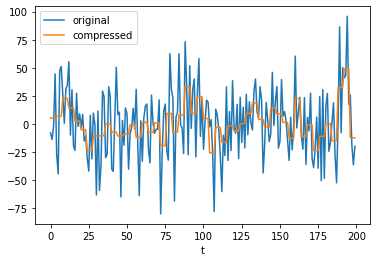

In [9]:
# Plotting sample
sub_ind, roi_ind = 1, 5
step = 4

sub = subjects[sub_ind]
ts_data = get_sub_ts(sub)
plt.plot(range(ts_data.shape[0]), ts_data[:, roi_ind], label="original")

compressed_ts = compress_ts_avg(ts_data[:, roi_ind], step=step)
overlay_compressed_ts = []
for i in compressed_ts:
    for j in range(step):
        overlay_compressed_ts.append(i)
overlay_compressed_ts = np.array(overlay_compressed_ts)

plt.plot(range(overlay_compressed_ts.shape[0]), overlay_compressed_ts, label="compressed")
plt.legend()
plt.xlabel('t')

### Slicing strategy

In [11]:
cutoff = 500
save_files = False

In [13]:
for sub in subjects:
    ts_data = get_sub_ts(sub)
    new_ts_data = ts_data[:cutoff]
    variant_dir = os.path.join(timeseries_variants_dir, "sliced")
    if save_files:
        if not os.path.exists(variant_dir):
            os.makedirs(variant_dir)
        np.savetxt(os.path.join(variant_dir, sub + "_timeseries.txt"),
            new_ts_data)